<a href="https://colab.research.google.com/github/Meghashyamt/python/blob/master/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def parser(x):
  return datetime.strptime(x,'%Y-%m')

data= pd.read_csv("sales.csv", index_col=0, parse_dates=[0], date_parser=parser)

In [14]:
data.head()

,Date
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


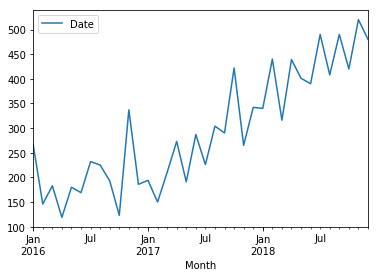

In [15]:
data.plot()

In [16]:
data.shift(1)

,Date
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


In [0]:
sales_diff= data.diff(periods=1)

In [0]:
sales_diff= sales_diff[1:]

In [22]:
sales_diff.head()

,Date
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


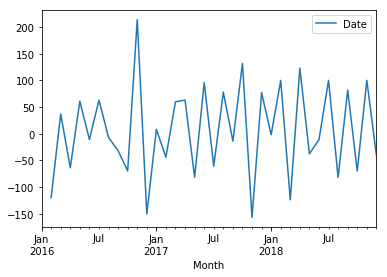

In [19]:
sales_diff.plot()

In [0]:
#from statsmodels import 

In [0]:
X= data.values
train= X[0:27]
test= X[26:]
predictions=[]

In [0]:
from sklearn.model_selection import train_test_split

In [26]:
train.size

27

# Auto regressive model AR model

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar= AR(train)
model_ar_fit= model_ar.fit()

In [0]:
predictions = model_ar_fit.predict(start =26, end=36)

In [31]:
test

array([[316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

In [32]:
predictions

array([348.46470112, 398.22922886, 368.27242294, 429.47485941,
       379.17750391, 431.35262347, 399.90234723, 433.3589338 ,
       418.74469463, 453.45711544, 429.65174489])

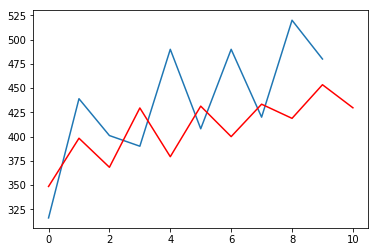

In [35]:
plt.plot(test)
plt.plot(predictions, color='red')

# ARIMA


In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [82]:
model_arima = ARIMA(train, order=(3,1,1))
model_arima_fit= model_arima.fit()
print(model_arima_fit.aic)

295.9979353418907


In [0]:
predictions= model_arima_fit.forecast(steps=10)[0]

In [84]:
predictions

array([388.10757533, 361.88626733, 431.54593512, 377.90909922,
       418.71331424, 398.84023074, 442.34725033, 420.19621983,
       447.0859106 , 436.33243804])

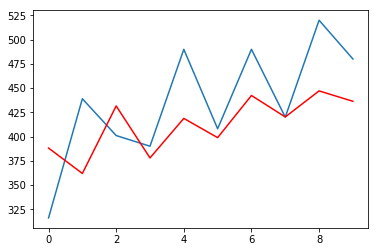

In [85]:
plt.plot(test)
plt.plot(predictions, color='red')

In [86]:
mean_squared_error(test,predictions)

2688.5110613447914